<a href="https://colab.research.google.com/github/borgesf/2021_06_13_Teste_Hipotese_Tratamento_Precoce/blob/main/2021_06_13_Teste_Hipotese_Tratamento_Precoce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste de hipótese (z-score) sobre tratamento precoce

No dia 06 de Junho de 2021, foi publicada [uma notícia](https://grandeponto.com.br/noticia/com-tratamento-precoce-hospital-de-natal-salva-100-de-vidas-contra-a-covid#.YLzwX9l7KLk.whatsapp) de que um hospital de campanha em Natal/RN
havia conseguido 100% de suscesso no tratamento de 100 pacientes com Covid ao utilizar o protocolo do "tratamento precoce". A notícia foi repassada em diversas mídias como uma comprovação de que o referido protocolo funciona. Nesse post, nos propomos a fazer um simples teste de hipótese para verificar essa afirmação.

A primeira informação que precisamos verificar é a taxa de letalidade da Covid. Idealmente, deveríamo comparar grupos semelhantes, com controle de faixa etária e comorbidades, por exemplo. Contudo, como essa informação não foi publicada na notícia, vamos agrupar todos os pacientes em um grupo único. 

Informações verificadas no site [Our World in Data](https://www.worldometers.info/coronavirus/) no dia 13/06/2021 mostram que o mundo havia registrado um total de 176.551.089 casos de Covid-19, contabilizando um total de 3.813.319 mortes. A divisão do segundo número pelo primeiro sugere uma proporção de mortes $p$:  

$$
p = \frac{3.813.319}{176.551.089} \approx 0.0216
$$

A pergunta que devemos nos fazer é: assumindo uma distribuição normal, qual a probabilidade de o fenômenos observado (recuperação total dos pacientes) ser simplesmente um efeito estatístico, e não uma contribuição do tratamento precoce para a recuperação dos pacientes? 

Estabelecemos então as seguintes premissas:  
<br />  

**Hipótese Nula ($H_0$)**: O tratamento precoce não tem eficácia, mantendo a mesmo taxa de mortalidade ($p = 0.0216$)  
**Hipótese Alternativa ($H_a$)**: O tratamento precoce reduz a mortalidade de pacientes com Covid-19 ($p < 0.0216$)  
**Nível de Significância ($\alpha$)**: 0.05 (5%)
<br />  

Iremos utilizar uma das formulações mais simples em testes de hipótese, o teste Z. Para que o teste de inferência seja válido, as amostras coletadas devem satisfazer três critérios: **Aleatoriedade**, **Independência** e **Normalidade**.  
<br />  

### **Aleatoriedade**
Amostras aleatórias devem prover  estatísticas não-enviesadas sobre a população amostrada. Ao lermos a notícia, descobrimos que o hospital em que o estudo foi realizado "...conta com 41 leitos exclusivos de Covid -19, sendo inicialmente 33 leitos de enfermaria clínica, quatro semi-intensivos, dois de estabilização e dois de admissão...". Percebe-se que não há leitos de terapia intensiva, ou seja, é bastante provável que pacientes com sintomas mais graves NÃO estejam representados em nossa estatística, o que poderia justificar a taxa de mortalidade abaixo da esperada. De toda forma, por simplicidade e conservadorismo, assumiremos que nossa amostra atende ao critério de aleatoriedade.
<br />  

### **Independência**
Uma segunda premissa que deve ser investigada é sobre a independência das nossas amostras, ou seja, se cada medida é independente da outra. Numa seleção independente, deveríamos amostrar a população com reposição, o que certamente não é o nosso caso. Contudo, quando a amostra representa menos de 10% da população estudada, podemos assumir a premissa de independência com certa confiança. Dado o número superior a 17 milhões de casos confirmados de Covid-19 no Brasil até o momento, nos parece seguro dizer que essa premissa é atendida.
<br />  

### **Normalidade**
A terceira premissa é de que a amostra selecionada tem distribuição normal. Essa premissa normalmente é valida se tivermos, representados em nossa amostra, um número superior a 10 de "sucessos" e "fracassos". Ou seja, numa amostra de tamanho $n$, com evento de probabilidade de ocorrência $p$, deveríamos satisfazer $np\geq 10$ e $n(1-p)\geq 10$. Em nosso exemplo, $n=100$ e $p=0.0216$. A condição de distribuição normal da amostra não é satisfeita - seriam necessárias ao menos 400 amostras para validá-la. Apesar disso, também assumiremos a premissa como válida, por simplicidade. 

***

Uma vez detalhadas as hipóteses acima, o próximo passo é calcular o Z-score, ou a estatística Z da amostra. O cálculo do Z-score nada mais é do que a "padronização" da estatística - a aplicação uma transformação linear que transforma a amostra em sua equivalente de média 0 e desvio padrão 1. Para isso, usamos a expressão

$$
Z = \dfrac{\hat{p} - p}{\sigma_{\hat{p}}},
$$

em que $Z$ é o score normalizado, $\hat{p}$ é a proporção de mortes observada na amostra (em nosso caso, $\hat{p}=0$), $p$ é a proporção esperada na hipótese nula ($p=0.0216$) e $\sigma_{\hat{p}}$ é o desvio padrão das proporções de diversas amostras, que pode ser aproximado (dada a hipótese de independência) como:

$$
\sigma_{\hat{p}} = \sqrt{\dfrac{p(1-p)}{n}}.
$$

Combinando as expressões acima, 

$$
Z = \dfrac{\hat{p} - p}{\sqrt{\dfrac{p(1-p)}{n}}} = \dfrac{0 - 0.0216}{\sqrt{\dfrac{0.0216\times(1-0.0216)}{100}}} \approx -1.49
$$

Intuitivamente, o Z-score representa quantos desvios-padrão (normalizados) de distância há entre a proporção observada na amostra (zero) e a proporção da hipótese nula (0.0216). Valores negativos indicam que, em uma curva normal, a amostra está à esquerda da média. A imagem abaixo mostra uma distribuição normal e o z-score obtido (linha pontilhada vermelha). 
<br />  <br />  

![](https://drive.google.com/uc?id=1--7BGblYRU_3G54oqGCw6SfikvJUOWLZ)

<br /> 
Vamos voltar nossa atenção para a área hachurada em vermelho. Essa área representa a probabilidade de uma amostra aleatória apresentar um z-score igual ou inferior ao calculado - ou, equivalentemente, a probabilidade de uma amostra apresentar uma proporção inferior à proporção assumida na hipótese nula, caso esta seja verdadeira. Para esse caso específico, essa área é de aproximadamente 6.9% da área total. Matematicamente, podemos escrever isso como

$$
P(Z\leq -1.49) = P(\hat{p}\leq p, \ n=100 \ | \ H_0) \approx 6.9\%
$$

O valor de 6.9%, ou 0.069, representa o **valor-p**, ou probabilidade de significância para essa amostra. Como nesse caso o valor-p foi superior ao nível de significância definido para esse teste (5%), não podemos rejeitar a hipótese nula, ou seja, **com base nessa amostra, não podemos afirmar que o protocolo de tratamento precoce diminuiu a letalidade da Covid-19.**

<br />  <br />  
### Fontes: [Khan Academy](https://www.khanacademy.org), [Portal Grande Ponto](https://grandeponto.com.br/noticia/com-tratamento-precoce-hospital-de-natal-salva-100-de-vidas-contra-a-covid#.YLzwX9l7KLk.whatsapp)

In [1]:
#Importando bibliotecas
import numpy as np
from scipy import stats


p_hat = 0.0216           # Proporção da hipótese nula (H_0)
n = 100                  # Número de amostras
p =0                     # Proporção da amostra
alpha = 0.05             # Nível de Significância

z_score = (p - p_hat)/np.sqrt(p_hat*(1-p_hat)/n)
print('O z-score é {z:.4f}'.format(z=z_score))

# Calcula o valor-p através da distribuição cumulativa de probabilidade
p_value = stats.norm.cdf(z_score)
print('O valor-p é {p:.4f}'.format(p=p_value))

if p_value<alpha:
  print('Rejeitamos a hipótese nula. Protocolo de tratamento precoce parece diminuir a letalidade da Covid-19.')
else:
  print('Não rejeitamos a hipótese nula. Protocolo de tratamento precoce parece não diminuir a letalidade da Covid-19.')


O z-score é -1.4858
O valor-p é 0.0687
Não rejeitamos a hipótese nula. Protocolo de tratamento precoce parece não diminuir a letalidade da Covid-19.


findfont: Font family ['Trebuchet MS'] not found. Falling back to DejaVu Sans.


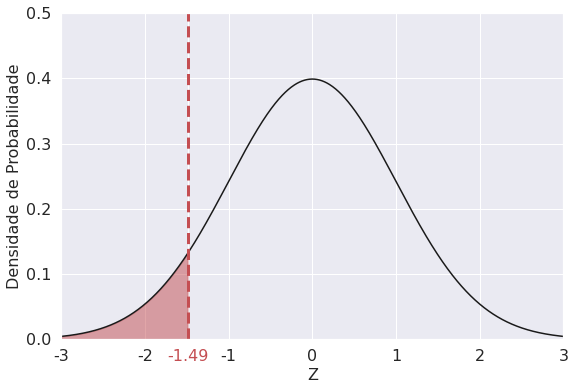

In [2]:
# Gráfico de Distribuição Normal
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.font_manager as font_manager
labelfont = {'fontname':'Trebuchet MS', 'fontsize':'16'}

from matplotlib.ticker import FormatStrFormatter

x = np.linspace(-3,3.01,1000,endpoint=True)
y = stats.norm.pdf(x)

Figure_1, ax = plt.subplots()
Figure_1.set_size_inches(9,6, forward=True)
plt.plot(x, y, color='k',alpha=1)
plt.plot([z_score,z_score], [0,0.5], color='r', linewidth=3, linestyle='--')
plt.xlabel("Z",**labelfont)
plt.xlim([-3,3])
plt.ylabel("Densidade de Probabilidade",**labelfont)
plt.ylim([0,0.5])
plt.yticks(np.arange(0,0.501,0.1),**labelfont) 
plt.xticks(np.arange(-3,3.01,1),**labelfont) 

# Formatando z_score
plt.xticks(list(plt.xticks()[0]) + [z_score])
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
Figure_1.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[-1] = "{:.2f}".format(z_score)
for ii,ticklabel in enumerate(plt.gca().get_xticklabels()):
    if ii==len(labels)-1:
        ticklabel.set_color('r')

ax.set_xticklabels(labels)

#Preenchendo Área
ax.fill_between(x[x<=z_score], y[x<=z_score],color='r',alpha=0.5)

plt.show()